In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv("pistachio.csv")
df = dfInit.copy(deep=True)
df = shuffle(df)

In [3]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
1198,80603,1214.2230,457.3537,227.8103,0.8671,320.3544,0.9754,82638,0.7490,2.0076,0.6870,0.7005,0.0057,0.0028,0.4906,0.9850,Kirmizi_Pistachio
1224,62610,1135.9950,403.5225,223.8322,0.8321,282.3429,0.8782,71296,0.6953,1.8028,0.6097,0.6997,0.0064,0.0036,0.4896,0.8826,Kirmizi_Pistachio
1214,72847,1096.6250,414.6591,232.0412,0.8288,304.5516,0.9384,77626,0.6662,1.7870,0.7612,0.7345,0.0057,0.0032,0.5394,0.9640,Kirmizi_Pistachio
433,88111,2569.4829,420.8587,289.3067,0.7263,334.9424,0.9184,95937,0.7422,1.4547,0.1677,0.7959,0.0048,0.0033,0.6334,0.9214,Siit_Pistachio
188,86580,1503.3230,428.6295,267.9256,0.7806,332.0197,0.9260,93500,0.7275,1.5998,0.4814,0.7746,0.0050,0.0031,0.6000,0.9599,Siit_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,76974,1808.1899,436.1127,250.8643,0.8180,313.0596,0.8982,85694,0.7183,1.7384,0.2958,0.7178,0.0057,0.0033,0.5153,0.8958,Kirmizi_Pistachio
1534,84300,1205.7600,477.2196,229.8328,0.8764,327.6188,0.9635,87492,0.7257,2.0764,0.7286,0.6865,0.0057,0.0027,0.4713,0.9786,Kirmizi_Pistachio
747,87016,1761.4640,433.3289,289.7881,0.7435,332.8546,0.8608,101085,0.6469,1.4953,0.3524,0.7681,0.0050,0.0033,0.5900,0.8823,Siit_Pistachio
389,76243,1147.8000,427.4913,236.7003,0.8327,311.5696,0.9252,82410,0.6910,1.8060,0.7272,0.7288,0.0056,0.0031,0.5312,0.9594,Kirmizi_Pistachio


#### Разделение данных

In [4]:
x = df.drop(['Class'], axis=1)
y = df['Class']

In [5]:
xTraining, xTest, yTraining, yTest = train_test_split(x, y, test_size = 0.3, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(xTraining)
xTrainingTransf = scaler.transform(xTraining)
xTestTransf = scaler.transform(xTest)

#### Многослойный перцептрон

In [7]:
def calculateAccuracy(mlpcClf: MLPClassifier):
    mlpcClf.fit(xTrainingTransf, yTraining)
    return mlpcClf.score(xTestTransf, yTest)

##### Количество нейронов на 1 уровне

In [8]:
hiddenLayerSizeArr = [(60,), (100,), (150,), (200,), (250,), (350,), (500,), (750,), (1000,)]
, max_iter=200

for layerSize in hiddenLayerSizeArr:
    mlpcClf = MLPClassifier(
        solver='lbfgs',
        hidden_layer_sizes=layerSize, 
        early_stopping=True,
        random_state=42)
    print('layerSize={0}, accuracy={1}'.format(layerSize, calculateAccuracy(mlpcClf)))

layerSize=(60,), accuracy=0.8468992248062015
layerSize=(100,), accuracy=0.8837209302325582
layerSize=(150,), accuracy=0.8410852713178295
layerSize=(200,), accuracy=0.8643410852713178
layerSize=(250,), accuracy=0.8565891472868217
layerSize=(350,), accuracy=0.8527131782945736
layerSize=(500,), accuracy=0.8643410852713178
layerSize=(750,), accuracy=0.8682170542635659
layerSize=(1000,), accuracy=0.8682170542635659


In [9]:
# Оптимизатор
solverArr = ['lbfgs', 'sgd', 'adam']

for solver in solverArr:
    mlpcClf = MLPClassifier(
        solver=solver,
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42)
    print('solver={0}, accuracy={1}'.format(solver, calculateAccuracy(mlpcClf)))

solver=lbfgs, accuracy=0.8410852713178295
solver=sgd, accuracy=0.8662790697674418
solver=adam, accuracy=0.872093023255814


In [10]:
fArr = ['identity', 'logistic', 'tanh', 'relu']

for f in fArr:
    mlpcClf = MLPClassifier(
        activation=f,
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42)
    print('f={0}, accuracy={1}'.format(f, calculateAccuracy(mlpcClf)))

f=identity, accuracy=0.8798449612403101
f=logistic, accuracy=0.8236434108527132
f=tanh, accuracy=0.8449612403100775
f=relu, accuracy=0.8410852713178295


In [11]:
iterArr = [200, 500, 700, 1000]

for iter in iterArr:
    mlpcClf = MLPClassifier(
        activation='relu',
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42,
        max_iter=iter)
    print('max_iter={0}, accuracy={1}'.format(iter, calculateAccuracy(mlpcClf)))

max_iter=200, accuracy=0.8410852713178295
max_iter=500, accuracy=0.8410852713178295
max_iter=700, accuracy=0.8410852713178295
max_iter=1000, accuracy=0.8410852713178295


In [12]:
mlpcClf = MLPClassifier(
        activation='relu',
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42,
        max_iter=200)
print('accuracy={0}'.format(calculateAccuracy(mlpcClf)))

accuracy=0.8410852713178295


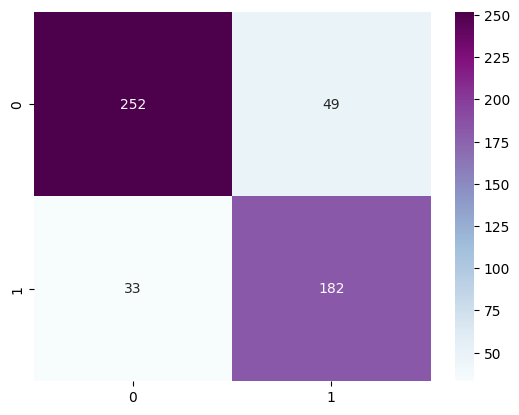

In [13]:
classes_names = ['0','1']
cm = pd.DataFrame(confusion_matrix(yTest, mlpcClf.predict(xTestTransf)), columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
plt.show()